In [149]:
import pandas as pd
from evaluation.generated_dataset import GeneratedDataset

In [150]:
mp_20 = pd.concat([
    GeneratedDataset.from_cache(('split', 'train'), 'mp_20').data,
    GeneratedDataset.from_cache(('split', 'val'), 'mp_20').data,
    GeneratedDataset.from_cache(('split', 'test'), 'mp_20').data],
    axis=0)

In [151]:
generated = {
    "wyformer": GeneratedDataset.from_cache(("WyckoffTransformer", "CrySPR", "CHGNet_fix_release")).data,
    "wyformer-diffcsp": GeneratedDataset.from_cache(("WyckoffTransformer", "DiffCSP++", "CHGNet_fix")).data,
    "DiffCSP": GeneratedDataset.from_cache(("DiffCSP", "CHGNet_fix")).data
}

In [152]:
import numpy as np
mp_20_sgs = np.histogram(mp_20.spacegroup_number, bins=range(1, 231))

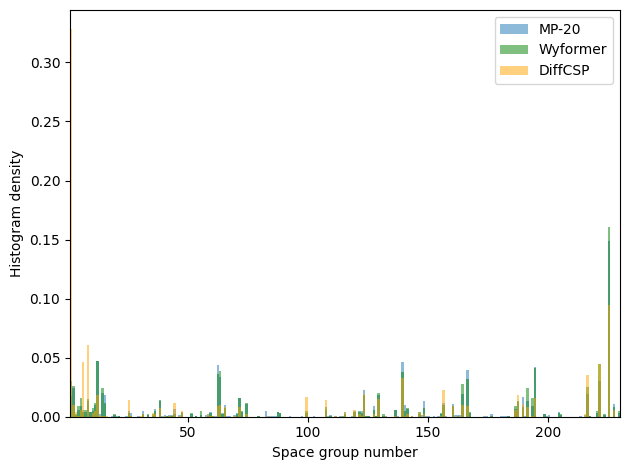

In [157]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#ax.step(mp_20_sgs[1][:-1], mp_20_sgs[0] / mp_20_sgs[0].sum(), label='MP-20', where='mid', alpha=0.5)
ax.hist(mp_20.spacegroup_number, bins=range(1, 231), alpha=0.5, label='MP-20', density=True)
ax.hist(generated['wyformer'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='Wyformer', density=True, color="green")
ax.hist(generated['DiffCSP'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='DiffCSP', density=True, color="orange")
#ax.hist(generated['wyformer-diffcsp'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='Wyformer-DiffCSP', density=True)
ax.set_xlabel('Space group number')
ax.set_ylabel('Histogram density')
ax.legend()
ax.set_xlim(1, 230)
fig.tight_layout()
fig.savefig('plots/AI4AM_NeurIPS_2024/ICLR_rebuttal/space_groups_all.pdf')

In [154]:
sg_order = np.argsort(mp_20_sgs[0])[::-1]
wyformer_sgs = np.histogram(generated['wyformer'].spacegroup_number, bins=range(1, 231))
wyformer_diffcsp_sgs = np.histogram(generated['wyformer-diffcsp'].spacegroup_number, bins=range(1, 231))
diffcsp_sgs = np.histogram(generated['DiffCSP'].spacegroup_number, bins=range(1, 231))

In [155]:
import pyxtal

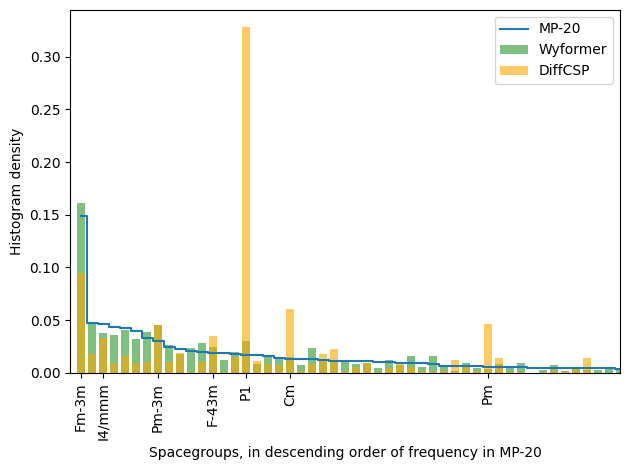

In [158]:
fig, ax = plt.subplots()

#ax.bar(mp_20_sgs[1][:-1], mp_20_sgs[0][sg_order] / mp_20_sgs[0].sum(), alpha=0.5, label='MP-20')
ax.bar(wyformer_sgs[1][:-1], wyformer_sgs[0][sg_order] / wyformer_sgs[0].sum(), alpha=0.5, label='Wyformer', color='green')
#ax.bar(wyformer_diffcsp_sgs[1][:-1], wyformer_diffcsp_sgs[0][sg_order] / wyformer_diffcsp_sgs[0].sum(), alpha=0.5, label='Wyformer-DiffCSP')
ax.bar(diffcsp_sgs[1][:-1], diffcsp_sgs[0][sg_order] / diffcsp_sgs[0].sum(), alpha=0.6, label='DiffCSP', color='orange')
ax.step(mp_20_sgs[1][:-1], mp_20_sgs[0][sg_order] / mp_20_sgs[0].sum(), label='MP-20', where='mid')
chosen_groups_ticks = (diffcsp_sgs[0][sg_order] / diffcsp_sgs[0].sum() > 0.03)
ax.set_xticks(np.arange(1, 230)[chosen_groups_ticks])
ax.set_xticklabels([pyxtal.Group(g).symbol for g in np.arange(1, 230)[sg_order][chosen_groups_ticks]], rotation=90)
ax.set_xlabel('Spacegroups, in descending order of frequency in MP-20')
ax.set_xlim(0, 50)
ax.set_ylabel('Histogram density')
ax.legend()
fig.tight_layout()
fig.savefig('plots/AI4AM_NeurIPS_2024/ICLR_rebuttal/space_groups_top50.pdf');